<a href="https://colab.research.google.com/github/lvbfontes/da-ebac-eda/blob/main/eda_amazon_rainforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of "Brazilian Amazon Rainforest Degradation" using SQL

This notebook is a student project, part of the Data Analyst course from EBAC.

It is based on content shared throughout the course, but with different data.

The objective of this project was to practice SQL and also to use some AWS tools like S3 and Athena.

## The Data

The data used here was found on Kaggle, and it is available on the following link:

https://www.kaggle.com/datasets/mbogernetto/brazilian-amazon-rainforest-degradation?select=def_area_2004_2019.csv


The dataset contains information about the degradation of the Amazon Rainforest.

It contains 3 csv files but only 2 will be analyzed on this notebook.

## The Environment

The csv files were stored on a S3 bucket, and then I've used Athena to generate the database and it's tables (deforestation and firespots).

Athena provides a user interface that makes it easier to create the tables and populate it using the csv data.

The following screenshot shows some of the parameters used to generate the 'firespots' table:



## Using Pandas to unpivot the deforestation csv data

One of the csv files has pivoted data, so I used Pandas functions to unpivot it and generated a new file, making it easier to analyze it later using SQL.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('def_area_2004_2019.csv')

In [ ]:
df.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [ ]:
df = pd.melt(df, id_vars=['Ano/Estados'], value_vars=['AC','AM','AP','MA','MT','PA','RO','RR','TO','AMZ LEGAL'], var_name='estado', value_name='deforested_area')

In [ ]:
df.head()

,Ano/Estados,estado,deforested_area
0,2004,AC,728
1,2005,AC,592
2,2006,AC,398
3,2007,AC,184
4,2008,AC,254


In [ ]:
df = df.rename(columns={'Ano/Estados': 'ano'})

In [ ]:
df.head()

,ano,estado,deforested_area
0,2004,AC,728
1,2005,AC,592
2,2006,AC,398
3,2007,AC,184
4,2008,AC,254


In [ ]:
df.to_csv('def_area_2004_2019_unpivoted.csv', index=False, header=False)

# Data Exploration

I'm mainly using SQL to explore and analyze the data rather than performing advanced calculations or process data to use in graphics. 

I'm trying to simulate the generation of quick insights directly on the database.

## Deforastation in Amazon Rainforest

Checking the amount of rows

```
SELECT COUNT(*) FROM def_area
```

160 rows


Using DESCRIBE function to see the columns and their respective data types

> Bloco com recuo


```
DESCRIBE def_area
```



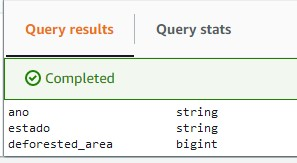

Checking 'ano' column distinct values

```
SELECT DISTINCT(ano) FROM def_area
```



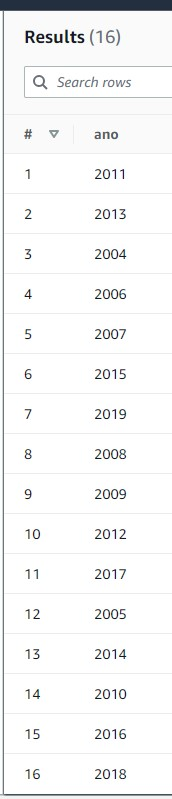


Checking distinct values from 'estado' column.

This represents states that composes the Amazon in Brazil, with tha addiction of the 'AMZ LEGAL' value which contains the aggregate values of the others states.
```
SELECT DISTINCT(estado) 
FROM def_area
```



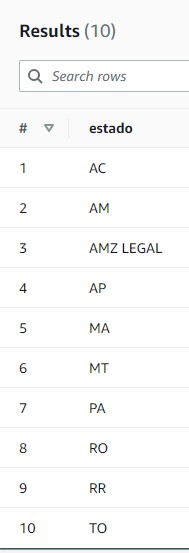

Checking the quantity of states registered for each year, with the exception of the 'AMZ LEGAL' registry.

```
SELECT COUNT(estado) AS estados_analisados, ano 
FROM def_area 
WHERE estado <> 'AMZ LEGAL' 
GROUP BY ano 
ORDER BY ano
```



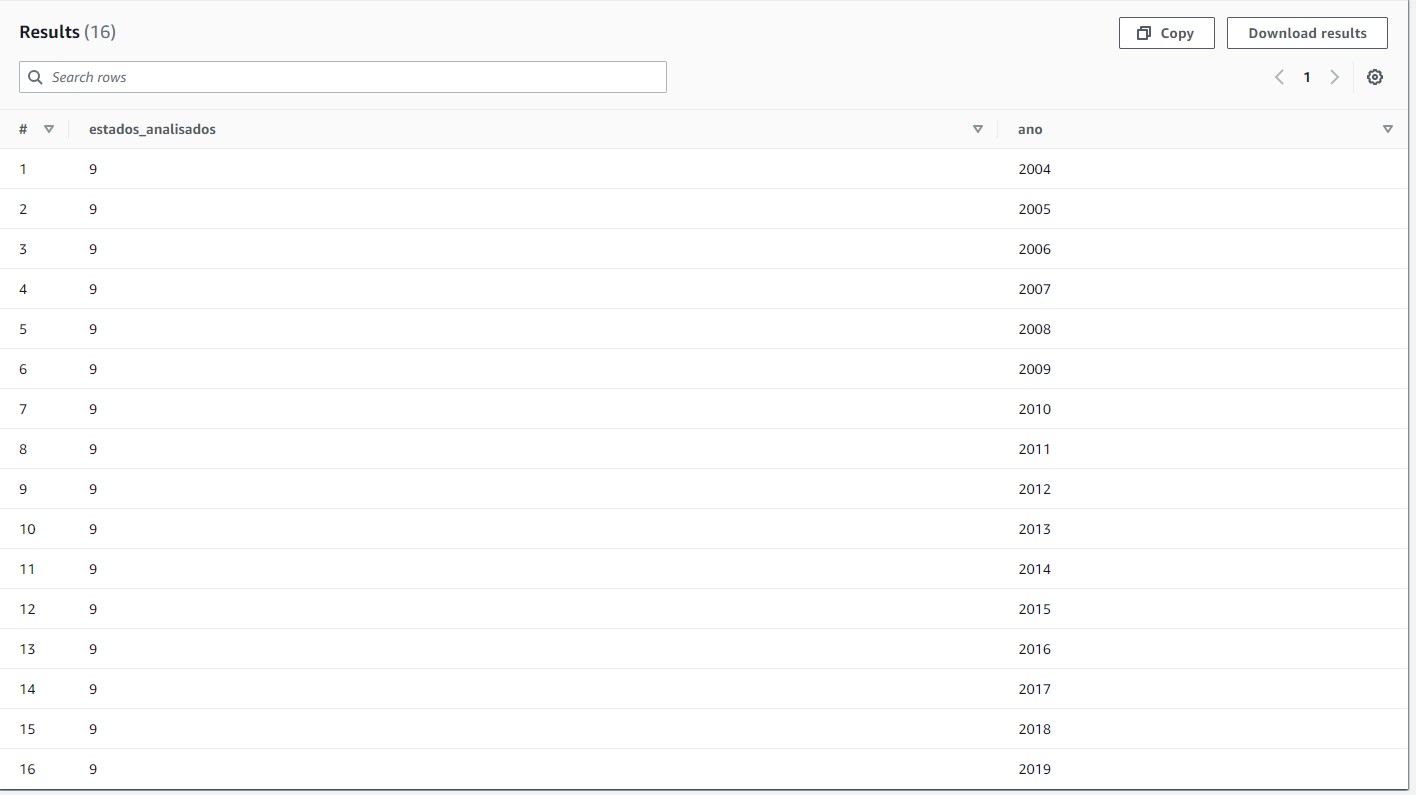


Querying for the sum of deforested area for each year.

The year with the higher registry of total deforested area in this dataset was 2004, and the lowest registry was 2019.
```
SELECT ano, SUM(deforested_area) deforested_sum 
FROM def_area WHERE estado <> 'AMZ LEGAL' 
GROUP BY ano 
ORDER BY ano
```



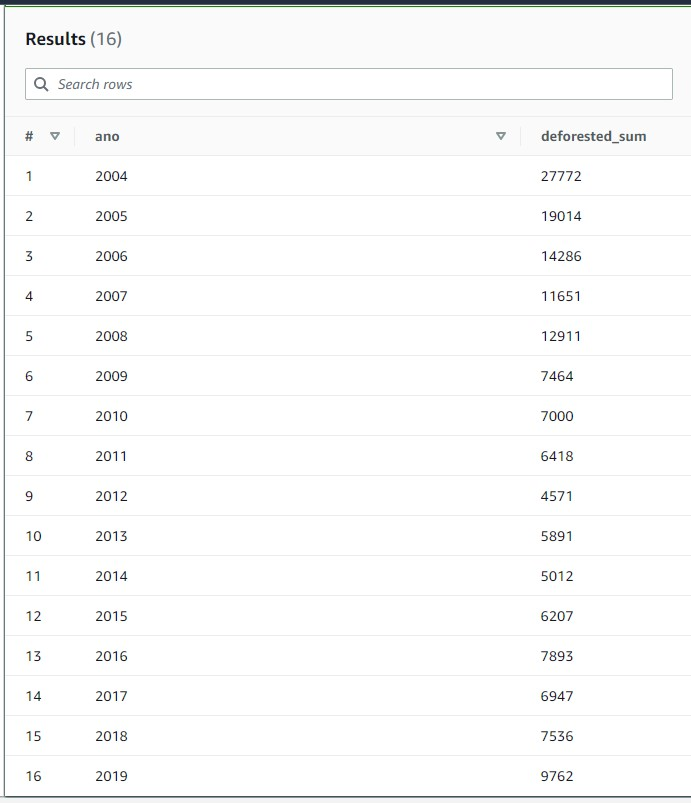

Querying for the top 10 registries of deforested area.

All 10 rows are either from MT or PA states, and the top 5 rows occured between 2004 and 2006, MT's deforastation in 2004 being the highest one.

```
SELECT ano, estado, deforested_area 
FROM def_area WHERE estado <> 'AMZ LEGAL' 
ORDER BY deforested_area 
DESC LIMIT 10

```



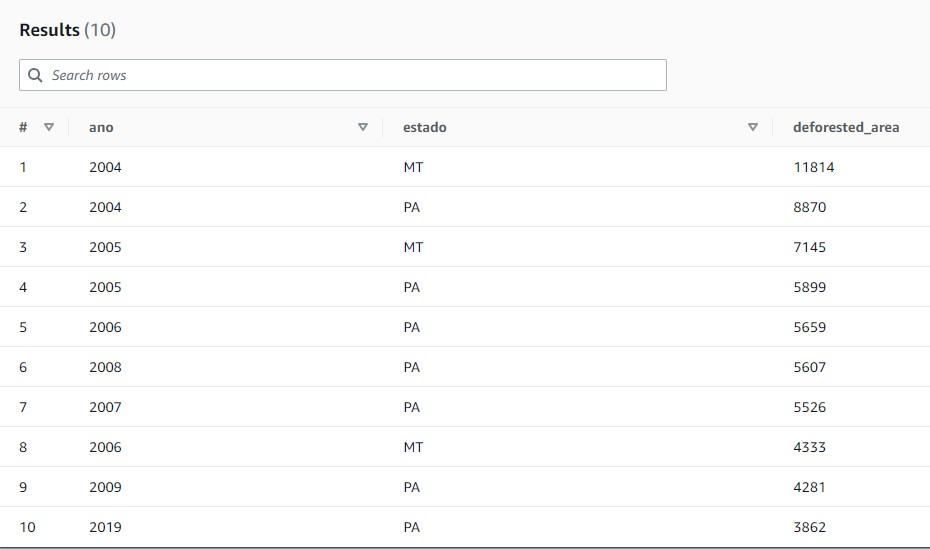

Querying for the total amount of deforested area by state.

PA, followed by MT state (which were the only ones in the overall top 10) are the top 2 states with most deforested area, followed by RO in third place.
AP has the least amount of deforetestation.

```
SELECT estado, SUM(deforested_area) AS deforested_area 
FROM def_area WHERE estado <> 'AMZ LEGAL' 
GROUP BY estado 
ORDER BY deforested_area DESC
```



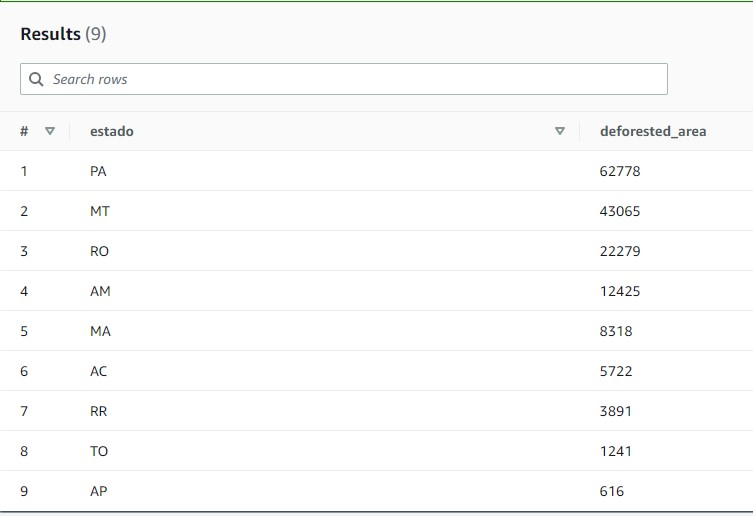

## Amazon fires from 1999 to 2019


Checking the amount of rows

```
SELECT COUNT(*) FROM inpe_amazon_fires
```



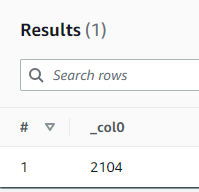

Using DESCRIBE function to see the columns and their respective data types

```
DESCRIBE inpe_amazon_fires
```

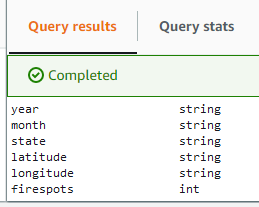

Checking the minimum and maximum registries form the 'year' column
```
SELECT MIN(year), MAX(year) FROM inpe_amazon_fires
```

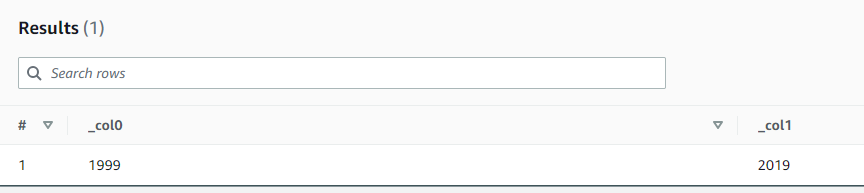


Checking the amount of distinct values from the 'year' column
```
SELECT COUNT(DISTINCT(year)) FROM inpe_amazon_fires
```



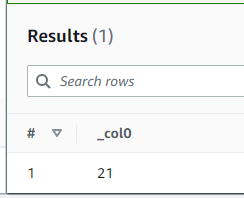

Checkin the distinct values from the 'month' column
```
SELECT DISTINCT(month) FROM inpe_amazon_fires ORDER BY month
```

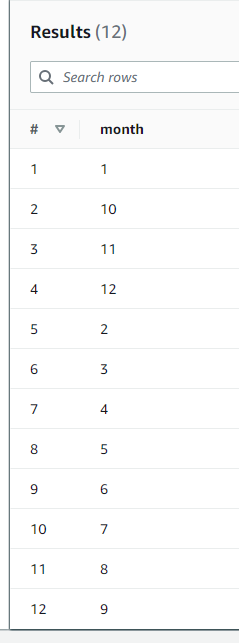

Checking distinct values from 'state' column
```
SELECT DISTINCT(state) FROM inpe_amazon_fires
```

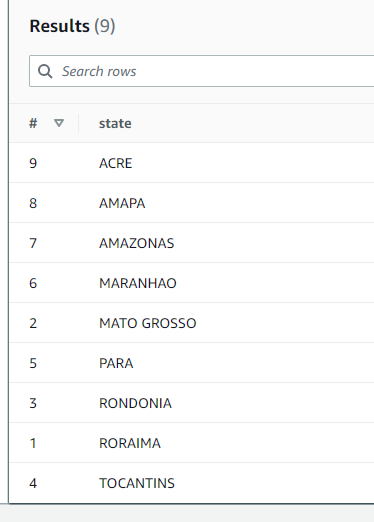

Querying for total firespots by state

The same top 3 states from the deforestation databse appear here in the top 3 positions
```
SELECT state, SUM(firespots) AS firespots 
FROM inpe_amazon_fires 
GROUP BY state 
ORDER BY firespots DESC
```

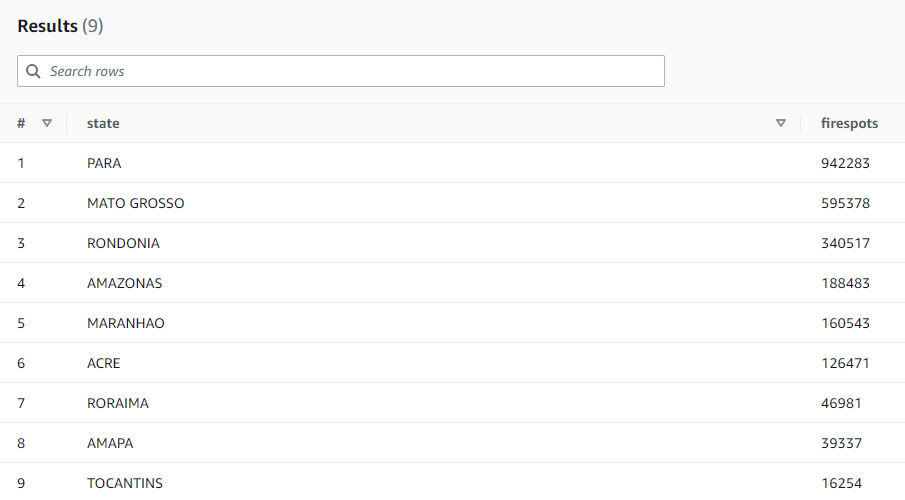

Checking the total of firespots by month

Firespots numbers are concetrated on the last six months of the year, september being the month with the higher amount of registries

Insight idea: to cross check this data with weather registries for these months in the Amazon states
```
SELECT month, SUM(firespots) AS firespots 
FROM inpe_amazon_fires 
GROUP BY month 
ORDER BY firespots DESC
```

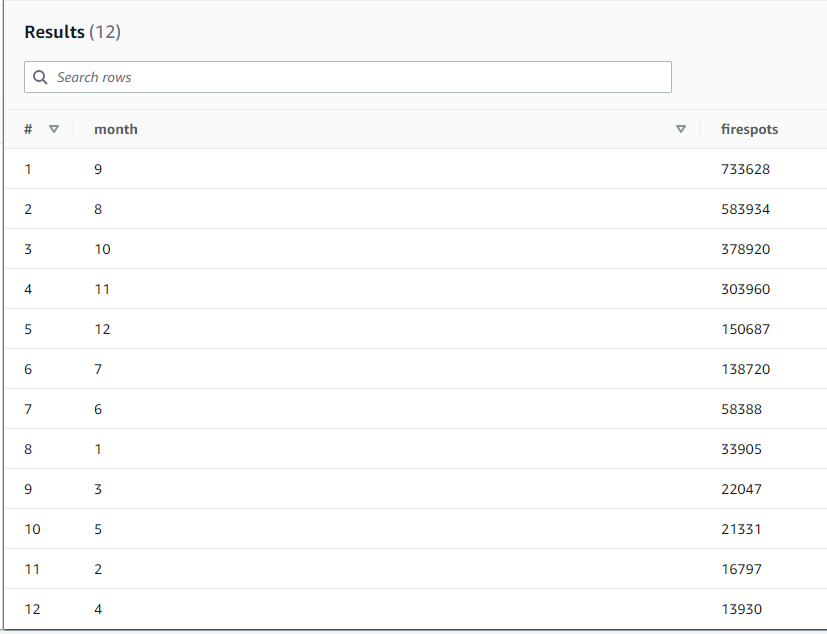